# Which differences are there between requests and selenium?

In [1]:
# Import
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import requests
import time

In [2]:
# Get n random wikipedia-pages
def wikiURLs(n=50):
    random_page = 'https://de.wikipedia.org/wiki/Spezial:Zuf%C3%A4llige_Seite'
    links = [BeautifulSoup(requests.get(random_page).text, 'lxml').find('link', {'rel':'canonical'})['href'] for _ in range(n)]
    
    return links

In [3]:
# Get the linked pages on the main url
def getLinks(url):
    urls = [url['href'] for url in BeautifulSoup(requests.get(url).text, 'lxml').findAll('a') if 'href' in url.attrs and url['href'].startswith('http')][:100]
    
    return urls

In [4]:
# Load all urls with requests and selenium, save the duration and return a DataFrame
def testLinks(urls, page):
    data = []
    
    # requests
    r_start = time.time()
    for url in tqdm(urls):
        response = requests.get(url)
    r_end = time.time()
    data.append([r_end-r_start, 'requests', page, len(urls)])
    
    # selenium
    s_start = time.time()
    driver = webdriver.Firefox()
    for url in tqdm(urls):
        driver.get(url)
    driver.close()
    s_end = time.time()
    data.append([s_end-s_start, 'selenium', page, len(urls)])
    
    df = pd.DataFrame(data, columns=['Duration', 'Package', 'Page', 'Page_Count'])
    
    return df

In [5]:
# Store all DataFrames
dfs = []

Test the packages with different Domains/URLs

In [6]:
wiki_urls = wikiURLs(n=100)
dfs.append(testLinks(wiki_urls, 'Wikipedia'))

100%|██████████| 100/100 [02:58<00:00,  1.64s/it]


In [7]:
urls = getLinks('https://www.via-ev.de/')
dfs.append(testLinks(urls, 'VIA'))

100%|██████████| 79/79 [06:02<00:00,  8.24s/it]


In [8]:
urls = getLinks('https://www.zeit.de/index')
dfs.append(testLinks(urls, 'Zeit'))

100%|██████████| 100/100 [13:56<00:00,  8.74s/it]


In [9]:
urls = getLinks('http://www.tagesschau.de/')
dfs.append(testLinks(urls, 'Tagesschau'))

100%|██████████| 83/83 [07:41<00:00,  4.15s/it]


In [10]:
urls = getLinks('http://www.spiegel.de/')
dfs.append(testLinks(urls, 'Spiegel'))

100%|██████████| 100/100 [18:08<00:00,  7.05s/it]


In [11]:
df = pd.concat(dfs)
df['Average_Duration'] = df['Duration']/df['Page_Count']
df.to_csv('build/Requests_vs_Selenium.csv', index=False)
df.head()

,Duration,Package,Page,Page_Count,Average_Duration
0,21.001731,requests,Wikipedia,100,0.210017
1,188.358156,selenium,Wikipedia,100,1.883582
0,39.097849,requests,VIA,79,0.494909
1,374.363826,selenium,VIA,79,4.738783
0,53.280776,requests,Zeit,100,0.532808


In [12]:
df = pd.read_csv('build/Requests_vs_Selenium.csv')

# How do the loading times of requests and selenium differ?

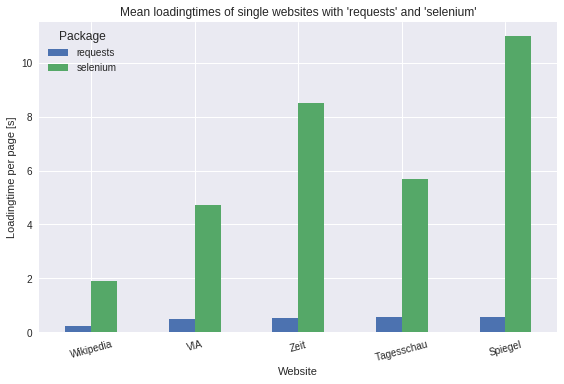

In [13]:
df[['Package', 'Page', 'Average_Duration']].pivot(index='Page', columns='Package', values='Average_Duration').sort_values(by='requests').plot(kind='bar')
plt.title("Mean loadingtimes of single websites with 'requests' and 'selenium'")
plt.xlabel('Website')
plt.ylabel('Loadingtime per page [s]')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('build/Requests_vs_Selenium.pdf')
plt.show()

# Requests is faster than seleniu by a factor of ~10

In [14]:
df.groupby('Package').agg({'Average_Duration':'mean'})

,Average_Duration
Package,
requests,0.476838
selenium,6.361523
